# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will train your CNN-RNN model.  

You are welcome and encouraged to try out many different architectures and hyperparameters when searching for a good model.

This does have the potential to make the project quite messy!  Before submitting your project, make sure that you clean up:
- the code you write in this notebook.  The notebook should describe how to train a single CNN-RNN architecture, corresponding to your final choice of hyperparameters.  You should structure the notebook so that the reviewer can replicate your results by running the code in this notebook.  
- the output of the code cell in **Step 2**.  The output should show the output obtained when training the model from scratch.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Training Setup
- [Step 2](#step2): Train your Model
- [Step 3](#step3): (Optional) Validate your Model

<a id='step1'></a>
## Step 1: Training Setup

In this step of the notebook, you will customize the training of your CNN-RNN model by specifying hyperparameters and setting other options that are important to the training procedure.  The values you set now will be used when training your model in **Step 2** below.

You should only amend blocks of code that are preceded by a `TODO` statement.  **Any code blocks that are not preceded by a `TODO` statement should not be modified**.

### Task #1

Begin by setting the following variables:
- `batch_size` - the batch size of each training batch.  It is the number of image-caption pairs used to amend the model weights in each training step. 
- `vocab_threshold` - the minimum word count threshold.  Note that a larger threshold will result in a smaller vocabulary, whereas a smaller threshold will include rarer words and result in a larger vocabulary.  
- `vocab_from_file` - a Boolean that decides whether to load the vocabulary from file. 
- `embed_size` - the dimensionality of the image and word embeddings.  
- `hidden_size` - the number of features in the hidden state of the RNN decoder.  
- `num_epochs` - the number of epochs to train the model.  We recommend that you set `num_epochs=3`, but feel free to increase or decrease this number as you wish.  [This paper](https://arxiv.org/pdf/1502.03044.pdf) trained a captioning model on a single state-of-the-art GPU for 3 days, but you'll soon see that you can get reasonable results in a matter of a few hours!  (_But of course, if you want your model to compete with current research, you will have to train for much longer._)
- `save_every` - determines how often to save the model weights.  We recommend that you set `save_every=1`, to save the model weights after each epoch.  This way, after the `i`th epoch, the encoder and decoder weights will be saved in the `models/` folder as `encoder-i.pkl` and `decoder-i.pkl`, respectively.
- `print_every` - determines how often to print the batch loss to the Jupyter notebook while training.  Note that you **will not** observe a monotonic decrease in the loss function while training - this is perfectly fine and completely expected!  You are encouraged to keep this at its default value of `100` to avoid clogging the notebook, but feel free to change it.
- `log_file` - the name of the text file containing - for every step - how the loss and perplexity evolved during training.

If you're not sure where to begin to set some of the values above, you can peruse [this paper](https://arxiv.org/pdf/1502.03044.pdf) and [this paper](https://arxiv.org/pdf/1411.4555.pdf) for useful guidance!  **To avoid spending too long on this notebook**, you are encouraged to consult these suggested research papers to obtain a strong initial guess for which hyperparameters are likely to work best.  Then, train a single model, and proceed to the next notebook (**3_Inference.ipynb**).  If you are unhappy with your performance, you can return to this notebook to tweak the hyperparameters (and/or the architecture in **model.py**) and re-train your model.

### Question 1

**Question:** Describe your CNN-RNN architecture in detail.  With this architecture in mind, how did you select the values of the variables in Task 1?  If you consulted a research paper detailing a successful implementation of an image captioning model, please provide the reference.

**Answer:** 
The model that is implemented in this project is the most straightforward implementation of a CNN-RNN based framework for image captioning. 

This architecture consists of two separate standalone models - an encoder and a decoder. The encoder in this framework is a convolutional neural network (CNN) and the decoder is a recurrent neural network (RNN).  For the encoder part, I have used the pretrained ResNet-152 model, which among those available from PyTorch, is one of the top performing models on the ImageNet dataset (https://pytorch.org/docs/master/torchvision/models.html). The encoder extracts the features from the images and transforms it into a compact vector representation. The image vector is mapped to the same space as the embedded word representations. I have used an embed size of 256. For the RNN decoder, I have used a 2-layer LSTM network with a hidden dimension of 512. The visual input processed by the encoder are fed to the RNN model directly only at the first time step followed by the words (embedded representations) of the target caption in order. I have applied dropout with a keep probability of 0.4 and used a training batch size of 128 images. I created a vocabulary of all words using vocab_threshold=4 during training which resulted in a vocabulary size of 9955 words. I have consulted the following reference materials for the model construction and hyperparameter selection:
1.	https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1174/reports/2741251.pdf
2.	https://arxiv.org/pdf/1411.4555.pdf
3.	https://arxiv.org/pdf/1502.03044.pdf

### (Optional) Task #2

Note that we have provided a recommended image transform `transform_train` for pre-processing the training images, but you are welcome (and encouraged!) to modify it as you wish.  When modifying this transform, keep in mind that:
- the images in the dataset have varying heights and widths, and 
- if using a pre-trained model, you must perform the corresponding appropriate normalization.

### Question 2

**Question:** How did you select the transform in `transform_train`?  If you left the transform at its provided value, why do you think that it is a good choice for your CNN architecture?

**Answer:** 
I have left the transform as it is as this is a very standard transformation technique and also the values provided are well suited for the pre-trained model I have used in this project. Since the input images can be of various sizes, I have first resized the image to 256 using bilinear interpolation. Then I have augmented the image by cropping at random locations with a fixed size of 224 x 224. Since the CNN-encoder accepts an image of size (224 x 224 x 3), this is my desired size of the input image. I have also used a horizontal flip to augment the image with a probability of 0.5 and then converted the image to a Tensor. Finally, I have normalized the image by the values used for the ImageNet dataset so that I can be consistent with the pre-trained model.

### Task #3

Next, you will specify a Python list containing the learnable parameters of the model.  For instance, if you decide to make all weights in the decoder trainable, but only want to train the weights in the embedding layer of the encoder, then you should set `params` to something like:
```
params = list(decoder.parameters()) + list(encoder.embed.parameters()) 
```

### Question 3

**Question:** How did you select the trainable parameters of your architecture?  Why do you think this is a good choice?

**Answer:** 
The CNN-encoder is taken from a pre-trained model, therefore, there is no need to retrain the model from scratch and only the last fully-connected layer needs to be modified to adapt the network to the given task (which, in this case, is to transform the input image into a feature vector). Therefore, for the encoder part, I only trained the weights in the embedding layer. I also added batch normalization layer to the list of trainable parameters. The goal of Batch Normalization is to normalize the outputs of a given internal layer of a neural network. Batch normalization is defined as    

\begin{equation*}
y =\frac{x-E[x]}{\sqrt{Var[x] + \epsilon}} *\gamma + \beta,
\end{equation*}
 
where $\alpha$ and $\beta$ are learnable parameters (https://pytorch.org/docs/master/generated/torch.nn.BatchNorm1d.html#torch.nn.BatchNorm1d).

I trained all weights in the the RNN-decoder, since I built it from scratch.

### Task #4

Finally, you will select an [optimizer](http://pytorch.org/docs/master/optim.html#torch.optim.Optimizer).

### Question 4

**Question:** How did you select the optimizer used to train your model?

**Answer:** 
In this paper https://arxiv.org/pdf/1502.03044.pdf, the authors used Adam algorithm to train the model for the MS COCO datasets. I also chose Adam optimizer, because it is the most efficient standard choice for training the models. In most cases, Adam optimizer helps to reach the optimum faster. 

In [1]:
%load_ext autoreload
%autoreload 2
# %reload_ext autoreload

In [2]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import torch
import torch.nn as nn
from torchvision import transforms
import math
import numpy as np
import os, sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from model import EncoderCNN, DecoderRNN

## TODO #1: Select appropriate values for the Python variables below.
batch_size = 128          # batch size
vocab_threshold = 4        # minimum word count threshold
vocab_from_file = True    # if True, load existing vocab file
embed_size = 256           # dimensionality of image and word embeddings
hidden_size = 512          # number of features in hidden state of the RNN decoder
num_epochs = 2             # number of training epochs
save_every = 1             # determines frequency of saving model weights
print_every = 100          # determines window for printing average loss
log_file = 'training_log.txt'       # name of file with saved training loss and perplexity

# (Optional) TODO #2: Amend the image transform below.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Build data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file)

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder. 
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move models to
# GPU if CUDA is available. 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

# Define the loss function. 
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()

# TODO #3: Specify the learnable parameters of the model.
params = list(decoder.parameters()) + list(encoder.embed.parameters())+ list(encoder.bn.parameters())

# TODO #4: Define the optimizer.
optimizer = torch.optim.Adam(params)

# Set the total number of training steps per epoch.
total_step = math.ceil(len(data_loader.dataset.caption_lengths) / data_loader.batch_sampler.batch_size)

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=1.03s)
creating index...


  0%|          | 345/414113 [00:00<02:00, 3443.16it/s]

index created!
/opt/cocoapi/annotations/captions_train2014.json
Obtaining caption lengths...


100%|██████████| 414113/414113 [01:33<00:00, 4427.51it/s]
Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.torch/models/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:03<00:00, 77011382.79it/s]


In [4]:
total_step = math.ceil(len(data_loader.dataset.caption_lengths) / data_loader.batch_sampler.batch_size)
total_step

3236

<a id='step2'></a>
## Step 2: Train your Model

Once you have executed the code cell in **Step 1**, the training procedure below should run without issue.  

It is completely fine to leave the code cell below as-is without modifications to train your model.  However, if you would like to modify the code used to train the model below, you must ensure that your changes are easily parsed by your reviewer.  In other words, make sure to provide appropriate comments to describe how your code works!  

You may find it useful to load saved weights to resume training.  In that case, note the names of the files containing the encoder and decoder weights that you'd like to load (`encoder_file` and `decoder_file`).  Then you can load the weights by using the lines below:

```python
# Load pre-trained weights before resuming training.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))
```

While trying out parameters, make sure to take extensive notes and record the settings that you used in your various training runs.  In particular, you don't want to encounter a situation where you've trained a model for several hours but can't remember what settings you used :).

### A Note on Tuning Hyperparameters

To figure out how well your model is doing, you can look at how the training loss and perplexity evolve during training - and for the purposes of this project, you are encouraged to amend the hyperparameters based on this information.  

However, this will not tell you if your model is overfitting to the training data, and, unfortunately, overfitting is a problem that is commonly encountered when training image captioning models.  

For this project, you need not worry about overfitting. **This project does not have strict requirements regarding the performance of your model**, and you just need to demonstrate that your model has learned **_something_** when you generate captions on the test data.  For now, we strongly encourage you to train your model for the suggested 3 epochs without worrying about performance; then, you should immediately transition to the next notebook in the sequence (**3_Inference.ipynb**) to see how your model performs on the test data.  If your model needs to be changed, you can come back to this notebook, amend hyperparameters (if necessary), and re-train the model.

That said, if you would like to go above and beyond in this project, you can read about some approaches to minimizing overfitting in section 4.3.1 of [this paper](http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7505636).  In the next (optional) step of this notebook, we provide some guidance for assessing the performance on the validation dataset.

In [4]:
import torch.utils.data as data
import numpy as np
import os
import requests
import time

# Open the training log file.
dirName = './models'
try:
    os.makedirs(dirName)    
    print("Directory " , dirName ,  " Created ")
except FileExistsError:
    print("Directory already exists")  

f = open(log_file, 'w')

old_time = time.time()
response = requests.request("GET", 
                            "http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token", 
                            headers={"Metadata-Flavor":"Google"})

print("num_epochs = {}, total_step = {}, save_every = {}, print_every = {}".format(
    num_epochs, total_step, save_every, print_every))

for epoch in range(1, num_epochs+1):
    start = time.time()
    timestamp = time.strftime('%Y%m%d%H%M')
    
    for i_step in range(1, total_step+1):
        
        if time.time() - old_time > 60:
            old_time = time.time()
            requests.request("POST", 
                             "https://nebula.udacity.com/api/v1/remote/keep-alive", 
                             headers={'Authorization': "STAR " + response.text})
        
        # Randomly sample a caption length, and sample indices with that length.
        indices = data_loader.dataset.get_train_indices()
        
        # Create and assign a batch sampler to retrieve a batch with the sampled indices.
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        data_loader.batch_sampler.sampler = new_sampler
        
        # Obtain the batch.
        images, captions = next(iter(data_loader))
        
        # Move batch of images and captions to GPU if CUDA is available.
        images = images.to(device)
        captions = captions.to(device)
        
        # Zero the gradients.
        decoder.zero_grad()
        encoder.zero_grad()
        
        # Pass the inputs through the CNN-RNN model.
        features = encoder(images)
        outputs = decoder(features, captions)
        
        # Calculate the batch loss.
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))
        
        # Backward pass.
        loss.backward()
        
        # Update the parameters in the optimizer.
        optimizer.step()
            
        # Get training statistics.
        stats = 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Perplexity: %5.4f' % (epoch, num_epochs, i_step, total_step, loss.item(), np.exp(loss.item()))
        
        # Print training statistics (on same line).
        print('\r' + stats, end="")
        sys.stdout.flush()
        
        # Print training statistics to file.
        f.write(stats + '\n')
        f.flush()
        
        # Print training statistics (on different line).
        if i_step % print_every == 0:
            print('\r' + stats)
            
    # Save the weights.
    end = time.time()
    if epoch % save_every == 0:
        torch.save(decoder.state_dict(), os.path.join('./models', 'decoder-{}.pkl'.format(timestamp)))
        torch.save(encoder.state_dict(), os.path.join('./models', 'encoder-{}.pkl'.format(timestamp)))
    print("\nTotal training time: {} mins".format((end-start)/60))

# Close the training log file.
f.close()

Directory already exists
num_epochs = 2, total_step = 3236, save_every = 1, print_every = 100
Epoch [1/2], Step [100/3236], Loss: 4.5112, Perplexity: 91.02892
Epoch [1/2], Step [200/3236], Loss: 3.8296, Perplexity: 46.04438
Epoch [1/2], Step [300/3236], Loss: 3.4537, Perplexity: 31.61672
Epoch [1/2], Step [400/3236], Loss: 3.4693, Perplexity: 32.1141
Epoch [1/2], Step [500/3236], Loss: 3.4561, Perplexity: 31.69254
Epoch [1/2], Step [600/3236], Loss: 3.3452, Perplexity: 28.36621
Epoch [1/2], Step [700/3236], Loss: 3.0663, Perplexity: 21.4626
Epoch [1/2], Step [800/3236], Loss: 3.0828, Perplexity: 21.8198
Epoch [1/2], Step [900/3236], Loss: 3.0843, Perplexity: 21.8532
Epoch [1/2], Step [1000/3236], Loss: 2.7598, Perplexity: 15.7970
Epoch [1/2], Step [1100/3236], Loss: 2.8662, Perplexity: 17.5702
Epoch [1/2], Step [1200/3236], Loss: 2.8728, Perplexity: 17.6862
Epoch [1/2], Step [1300/3236], Loss: 2.5536, Perplexity: 12.8533
Epoch [1/2], Step [1400/3236], Loss: 2.6774, Perplexity: 14.5476


<a id='step3'></a>
## Step 3: (Optional) Validate your Model

To assess potential overfitting, one approach is to assess performance on a validation set.  If you decide to do this **optional** task, you are required to first complete all of the steps in the next notebook in the sequence (**3_Inference.ipynb**); as part of that notebook, you will write and test code (specifically, the `sample` method in the `DecoderRNN` class) that uses your RNN decoder to generate captions.  That code will prove incredibly useful here. 

If you decide to validate your model, please do not edit the data loader in **data_loader.py**.  Instead, create a new file named **data_loader_val.py** containing the code for obtaining the data loader for the validation data.  You can access:
- the validation images at filepath `'/opt/cocoapi/images/train2014/'`, and
- the validation image caption annotation file at filepath `'/opt/cocoapi/annotations/captions_val2014.json'`.

The suggested approach to validating your model involves creating a json file such as [this one](https://github.com/cocodataset/cocoapi/blob/master/results/captions_val2014_fakecap_results.json) containing your model's predicted captions for the validation images.  Then, you can write your own script or use one that you [find online](https://github.com/tylin/coco-caption) to calculate the BLEU score of your model.  You can read more about the BLEU score, along with other evaluation metrics (such as TEOR and Cider) in section 4.1 of [this paper](https://arxiv.org/pdf/1411.4555.pdf).  For more information about how to use the annotation file, check out the [website](http://cocodataset.org/#download) for the COCO dataset.

In [20]:
# (Optional) TODO: Validate your model.
from data_loader_val import get_loader, clean_sentence, evaluate_caption

# Define a transform to pre-process the testing images.
transform_val = transforms.Compose([transforms.Resize((224,224)),                    # resize image
                                     transforms.ToTensor(),                           # convert the PIL Image to a tensor
                                     transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                                     (0.229, 0.224, 0.225))])

# Create the data loader.
data_loader = get_loader(transform=transform_val,    
                         mode='val')

# vocab_size = len(data_loader.dataset.vocab)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

encoder_file = 'encoder-202005102112.pkl'
decoder_file = 'decoder-202005102112.pkl'

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=5.68s)
creating index...
index created!
loading annotations into memory...
Done (t=0.43s)
creating index...
index created!


In [21]:
import nltk
import random
from tqdm import tqdm
from nltk.translate import bleu_score
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image, image_id, captions, file_name = next(iter(data_loader))

# Move models and images to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features.unsqueeze(1))
print(output)

[0, 3, 80, 13, 51, 170, 39, 3, 55, 18, 1, 1, 1, 18, 1, 1, 1, 18, 1, 1]


val image shape: torch.Size([1, 3, 224, 224])


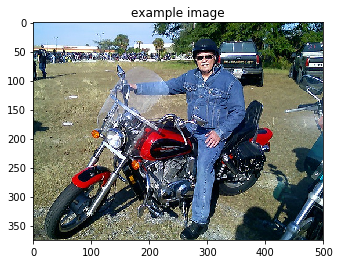

reference captions:

a man sitting on a red and black motorcycle
An elderly man on a red motorcycle. 
The man is sitting on his motorcycle. 
A man is wearing jeans on a red motorcycle.
A man wearing a jean jacket sitting on a motorcycle.

predicted caption:

A couple of people are sitting on a motorcycle

BLEU-4 smoothing method4: 0.315598


In [8]:
# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

reference = []
print("reference captions:\n")
for caption in captions:
    print(caption[0])
    token = nltk.tokenize.word_tokenize(str(caption[0]).lower())
    reference.append(token) 
    
sentence = clean_sentence(data_loader, output)
print()
print('predicted caption:\n')
print(sentence)

hypothesis = nltk.tokenize.word_tokenize(str(sentence).lower())

bleu4 = bleu_score.sentence_bleu(references=reference,
                                hypothesis=hypothesis,
                                 smoothing_function=bleu_score.SmoothingFunction().method4)
print('\nBLEU-4 smoothing method4: %f' % bleu4)

In [43]:
instances_annFile = os.path.join('/opt/cocoapi/annotations/instances_val2014.json')
coco = COCO(instances_annFile)
ids = list(coco.anns.keys())

ids_all = {}
for index in range(len(ids)):
    ids_all[index]=ids[index]

ids_sample = random.sample(ids_all.keys(), 500)

bleu4_all = []

for key in tqdm(ids_sample, leave = False, position = 0):
    _, image, _, captions, _ = data_loader.dataset[key]

    reference = []
    for caption in captions:
        token = nltk.tokenize.word_tokenize(str(caption).lower())
        reference.append(token) 

    image = image.to(device)
    features = encoder(image.unsqueeze(0))
    output = decoder.sample(features.unsqueeze(0))
    if output[0] != 1:
        sentence = clean_sentence(data_loader, output)
        hypothesis = nltk.tokenize.word_tokenize(str(sentence).lower())
        bleu4 = bleu_score.sentence_bleu(references=reference,
                                    hypothesis=hypothesis,
                                    smoothing_function=bleu_score.SmoothingFunction().method4)
        bleu4_all.append(bleu4)

loading annotations into memory...


Done (t=7.04s)
creating index...
index created!


Text(0.5,1,'BLUE score (in descending order) for 500 randomly selected images')

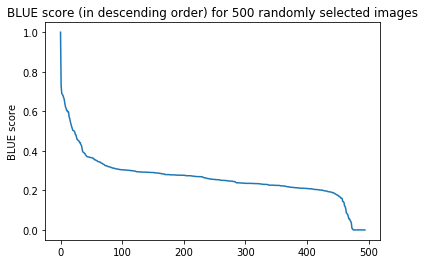

In [44]:
plt.plot(sorted(bleu4_all, reverse=True))
plt.ylabel('BLUE score')
plt.title('BLUE score (in descending order) for 500 randomly selected images')